# Libraries

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd # https://python-sounddevice.readthedocs.io/
from ChunksProcessing.PyChronux import *

In [54]:
fs = 44100
t_end = 3
freq = np.concatenate([np.arange(start=0, stop=22000, step=2500),np.zeros(1)])

t = np.arange(0, t_end, 1/fs)
n = len(t)
d = len(freq)
m = n//d

data = np.zeros(n)

for (i,f) in enumerate(freq): 
    if i!=d-1: range_ = np.arange(start=i*m, stop=(i+1)*m+1, step=1)
    else: range_ = np.arange(start=i*m, stop=n, step=1)
    data[range_] = np.sin(2*np.pi*f*t[range_])

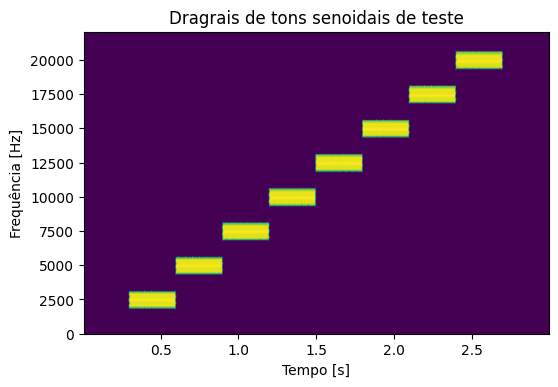

In [55]:
params = Params(tapers = [7, 11], Fs=fs, pad=0, fpass=[0, fs/2], trialave=0, err=[0, 0.05])
movingwin = [0.01, 0.001]
S, t, f = mtspecgramc(data.ravel(), movingwin, params)
S[:] = (S-np.min(S))/(np.max(S)-np.min(S))

chunked_pcolormesh(t, f, S, v=[0,1], lang='pt', title='Dragrais de tons senoidais de teste')

In [57]:
sd.play(data, fs, loop=True) # loop through sample

In [56]:
sd.stop() # stop sound device play